In [2]:
import pandas as pd
import numpy as np
import datetime
import warnings
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)

In [3]:
customer_df = pd.read_csv('./files_for_lab/we_fn_use_c_marketing_customer_value_analysis.csv') 
customer_df

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,23405.987980,No,Basic,Bachelor,2/10/11,Employed,M,71941,Urban,Married,73,18,89,0,2,Personal Auto,Personal L1,Offer2,Web,198.234764,Four-Door Car,Medsize
9130,PK87824,California,3096.511217,Yes,Extended,College,2/12/11,Employed,F,21604,Suburban,Divorced,79,14,28,0,1,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize
9131,TD14365,California,8163.890428,No,Extended,Bachelor,2/6/11,Unemployed,M,0,Suburban,Single,85,9,37,3,2,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize
9132,UP19263,California,7524.442436,No,Extended,College,2/3/11,Employed,M,21941,Suburban,Married,96,34,3,0,3,Personal Auto,Personal L2,Offer3,Branch,691.200000,Four-Door Car,Large


In [4]:
customer_df.shape

(9134, 24)

In [5]:
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   State                          9134 non-null   object 
 2   Customer Lifetime Value        9134 non-null   float64
 3   Response                       9134 non-null   object 
 4   Coverage                       9134 non-null   object 
 5   Education                      9134 non-null   object 
 6   Effective To Date              9134 non-null   object 
 7   EmploymentStatus               9134 non-null   object 
 8   Gender                         9134 non-null   object 
 9   Income                         9134 non-null   int64  
 10  Location Code                  9134 non-null   object 
 11  Marital Status                 9134 non-null   object 
 12  Monthly Premium Auto           9134 non-null   i

In [6]:
customer_df.describe()

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
count,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000
mean,8004.940475,37657.380009,93.219291,15.097000,48.064594,0.384388,2.966170,434.088794
std,6870.967608,30379.904734,34.407967,10.073257,27.905991,0.910384,2.390182,290.500092
min,1898.007675,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.099007
25%,3994.251794,0.000000,68.000000,6.000000,24.000000,0.000000,1.000000,272.258244
50%,5780.182197,33889.500000,83.000000,14.000000,48.000000,0.000000,2.000000,383.945434
75%,8962.167041,62320.000000,109.000000,23.000000,71.000000,0.000000,4.000000,547.514839
max,83325.381190,99981.000000,298.000000,35.000000,99.000000,5.000000,9.000000,2893.239678


In [7]:
customer_df1 = customer_df.copy()

In [8]:
cols1 = [customer_df.columns[i].upper().replace(' ', '_') for i in range(len(customer_df1.columns)) ]
customer_df1.columns = cols1

In [9]:
print(customer_df1.columns)

Index(['CUSTOMER', 'STATE', 'CUSTOMER_LIFETIME_VALUE', 'RESPONSE', 'COVERAGE',
       'EDUCATION', 'EFFECTIVE_TO_DATE', 'EMPLOYMENTSTATUS', 'GENDER',
       'INCOME', 'LOCATION_CODE', 'MARITAL_STATUS', 'MONTHLY_PREMIUM_AUTO',
       'MONTHS_SINCE_LAST_CLAIM', 'MONTHS_SINCE_POLICY_INCEPTION',
       'NUMBER_OF_OPEN_COMPLAINTS', 'NUMBER_OF_POLICIES', 'POLICY_TYPE',
       'POLICY', 'RENEW_OFFER_TYPE', 'SALES_CHANNEL', 'TOTAL_CLAIM_AMOUNT',
       'VEHICLE_CLASS', 'VEHICLE_SIZE'],
      dtype='object')


In [10]:
customer_df1['EFFECTIVE_TO_DATE']= pd.to_datetime(customer_df1['EFFECTIVE_TO_DATE'])

In [11]:
customer_df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   CUSTOMER                       9134 non-null   object        
 1   STATE                          9134 non-null   object        
 2   CUSTOMER_LIFETIME_VALUE        9134 non-null   float64       
 3   RESPONSE                       9134 non-null   object        
 4   COVERAGE                       9134 non-null   object        
 5   EDUCATION                      9134 non-null   object        
 6   EFFECTIVE_TO_DATE              9134 non-null   datetime64[ns]
 7   EMPLOYMENTSTATUS               9134 non-null   object        
 8   GENDER                         9134 non-null   object        
 9   INCOME                         9134 non-null   int64         
 10  LOCATION_CODE                  9134 non-null   object        
 11  MARITAL_STATUS   

In [12]:
customer_df1

,CUSTOMER,STATE,CUSTOMER_LIFETIME_VALUE,RESPONSE,COVERAGE,EDUCATION,EFFECTIVE_TO_DATE,EMPLOYMENTSTATUS,GENDER,INCOME,LOCATION_CODE,MARITAL_STATUS,MONTHLY_PREMIUM_AUTO,MONTHS_SINCE_LAST_CLAIM,MONTHS_SINCE_POLICY_INCEPTION,NUMBER_OF_OPEN_COMPLAINTS,NUMBER_OF_POLICIES,POLICY_TYPE,POLICY,RENEW_OFFER_TYPE,SALES_CHANNEL,TOTAL_CLAIM_AMOUNT,VEHICLE_CLASS,VEHICLE_SIZE
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2011-02-24,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,2011-01-31,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2011-02-19,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,2011-01-20,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2011-02-03,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,23405.987980,No,Basic,Bachelor,2011-02-10,Employed,M,71941,Urban,Married,73,18,89,0,2,Personal Auto,Personal L1,Offer2,Web,198.234764,Four-Door Car,Medsize
9130,PK87824,California,3096.511217,Yes,Extended,College,2011-02-12,Employed,F,21604,Suburban,Divorced,79,14,28,0,1,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize
9131,TD14365,California,8163.890428,No,Extended,Bachelor,2011-02-06,Unemployed,M,0,Suburban,Single,85,9,37,3,2,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize
9132,UP19263,California,7524.442436,No,Extended,College,2011-02-03,Employed,M,21941,Suburban,Married,96,34,3,0,3,Personal Auto,Personal L2,Offer3,Branch,691.200000,Four-Door Car,Large


C:\Users\Dmitr\AppData\Local\Temp\ipykernel_3344\1966106915.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = customer_df1.corr(method='pearson')


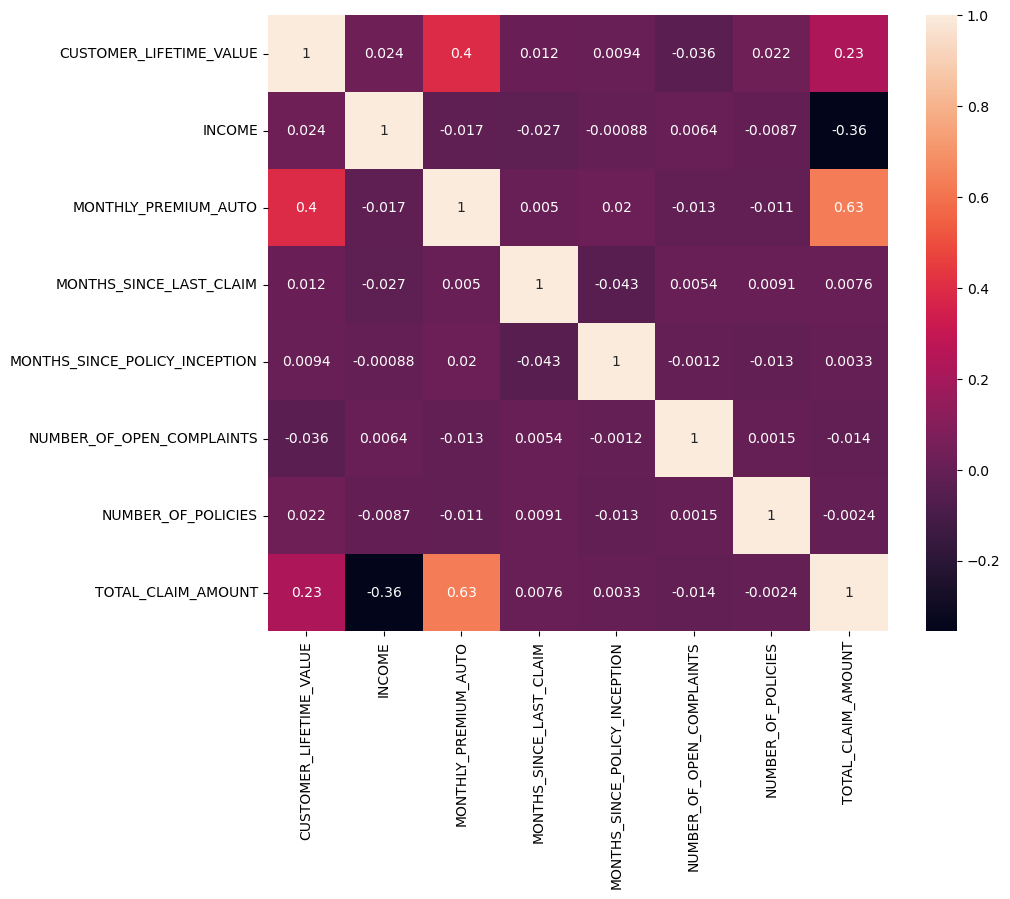

In [13]:
corr_matrix = customer_df1.corr(method='pearson') 
fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(corr_matrix, annot=True)
plt.show()

1. The strongest correlation is between "total claim amount" and "monthly premium auto". This totaly makes sense as usually the higher your monthly insurance payment - the more insurance covers. 
2. Second strongest correlation is between customer lifetime value and monthly premium auto.
3. Almost the same strong but negative correlation is between income and total claim amount. Probably there are some policy for lower income customers.
4. There are no multi-colinearity in the matrix.

In [14]:
customer_df1_numerical = customer_df1.select_dtypes("number") # separating numerical from categorical values
customer_df1_categorical = customer_df1.select_dtypes("object")
customer_df1_categorical = customer_df1_categorical.drop(['CUSTOMER'], axis = 1) # dropping the ID column, not going to use it for alanysis

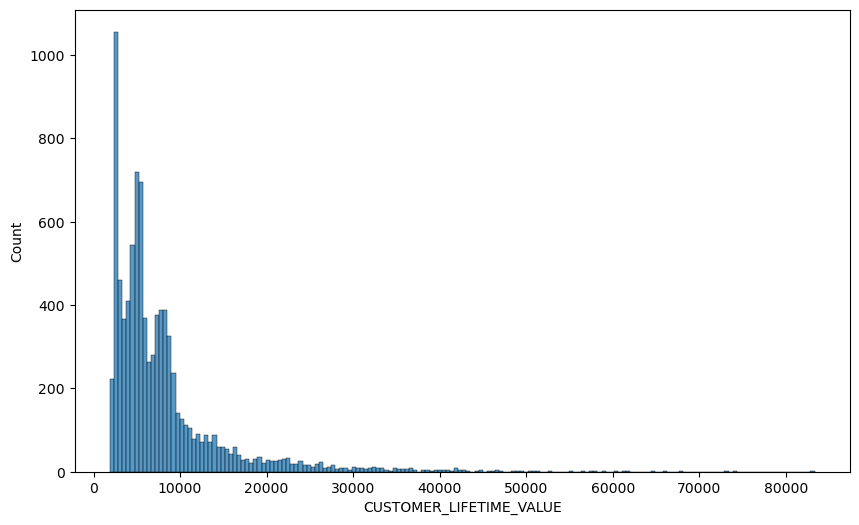

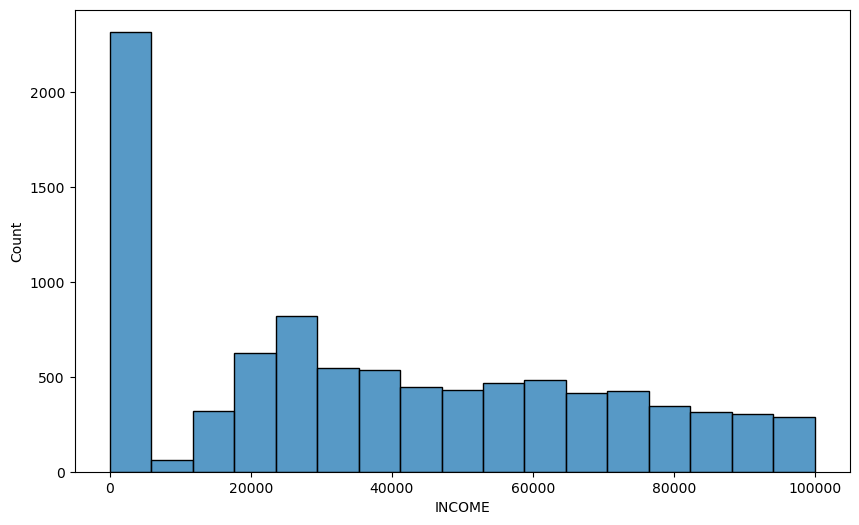

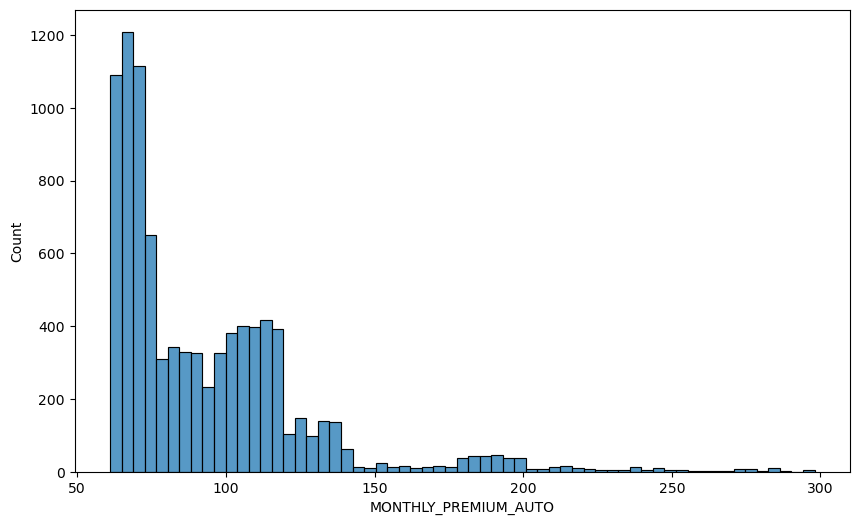

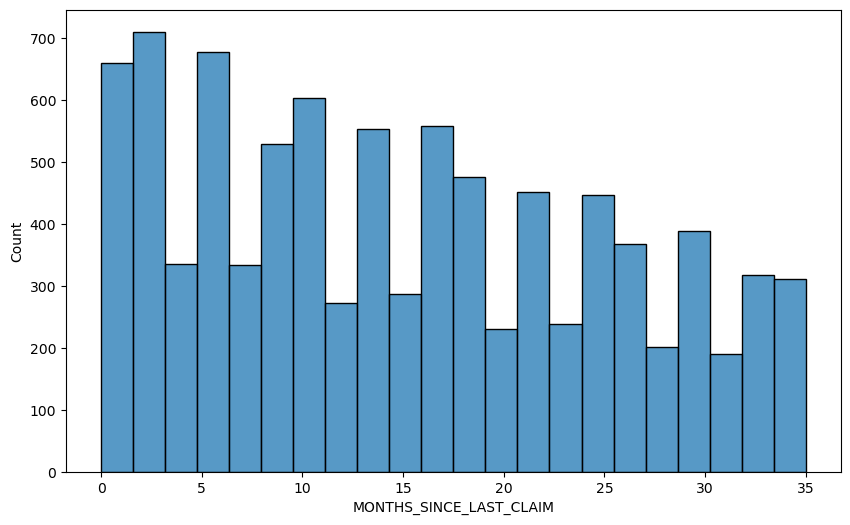

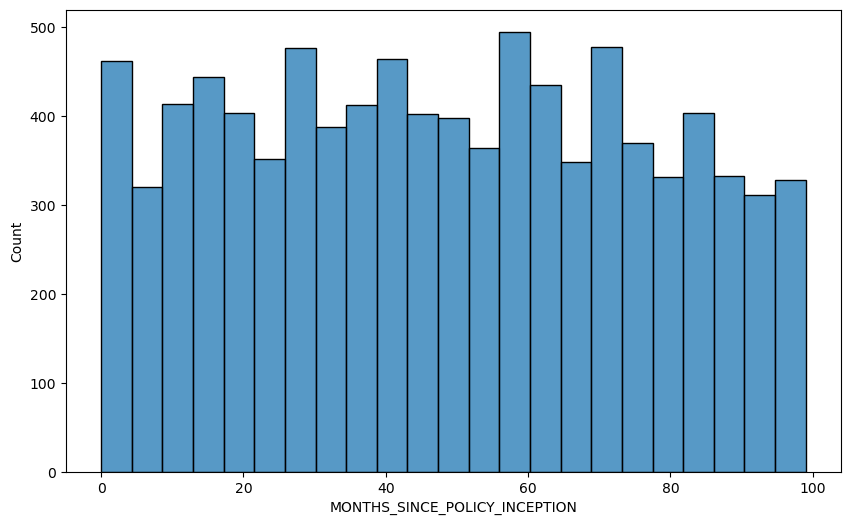

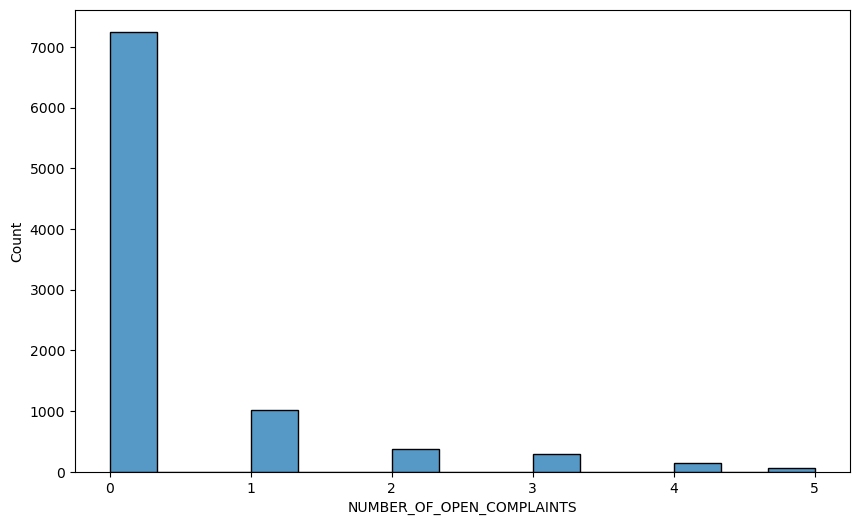

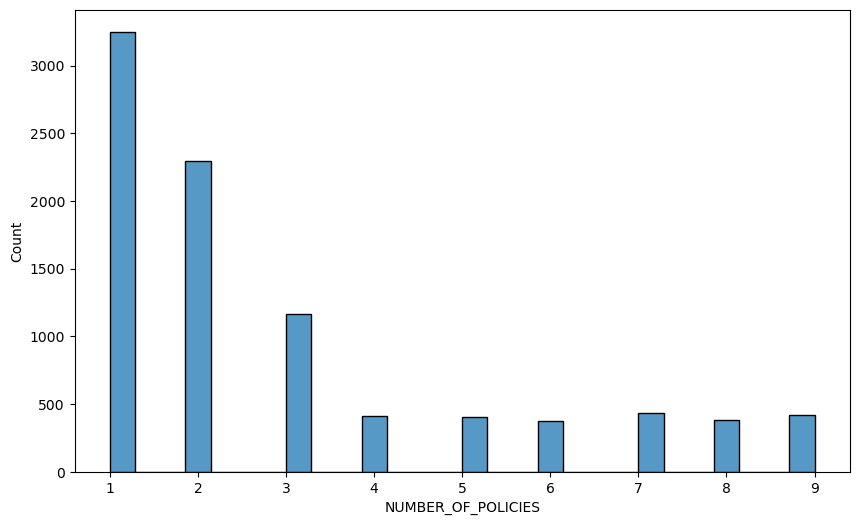

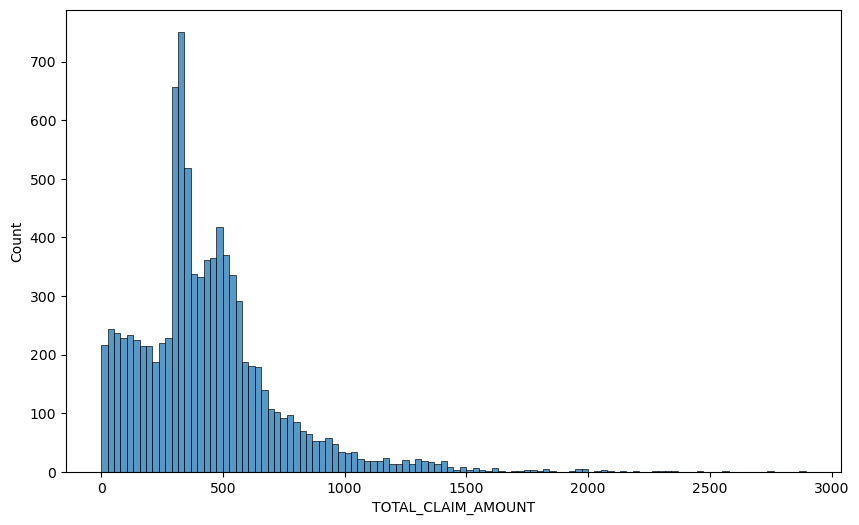

In [15]:
for col in customer_df1_numerical:
    plt.figure(figsize = (10,6))
    sns.histplot(customer_df1_numerical[col])

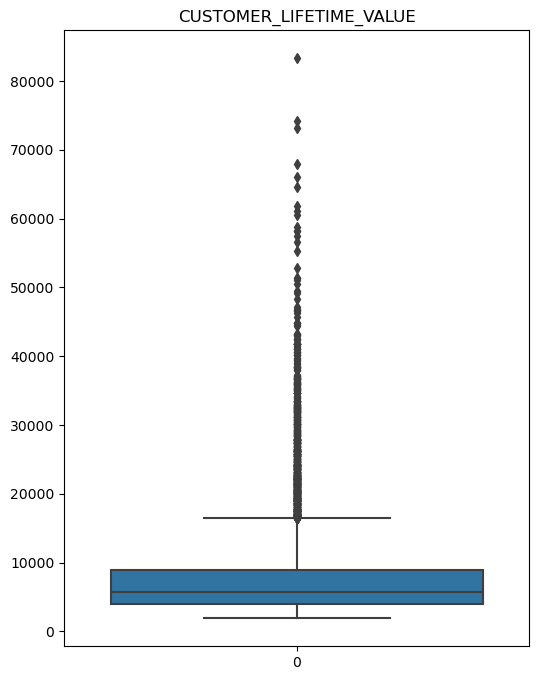

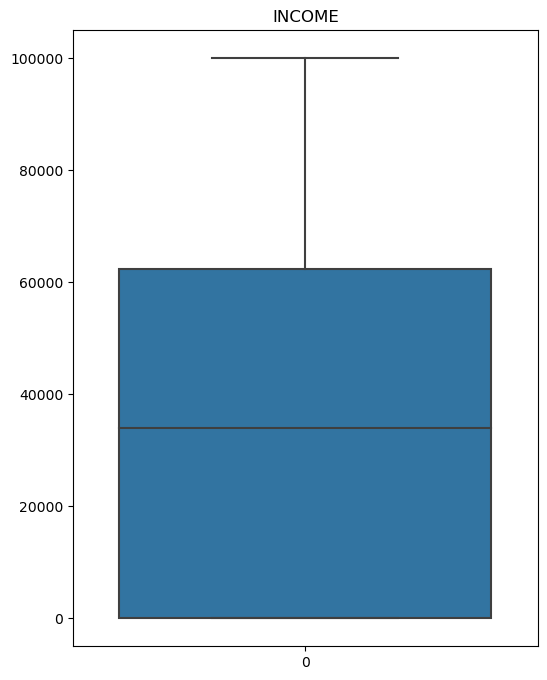

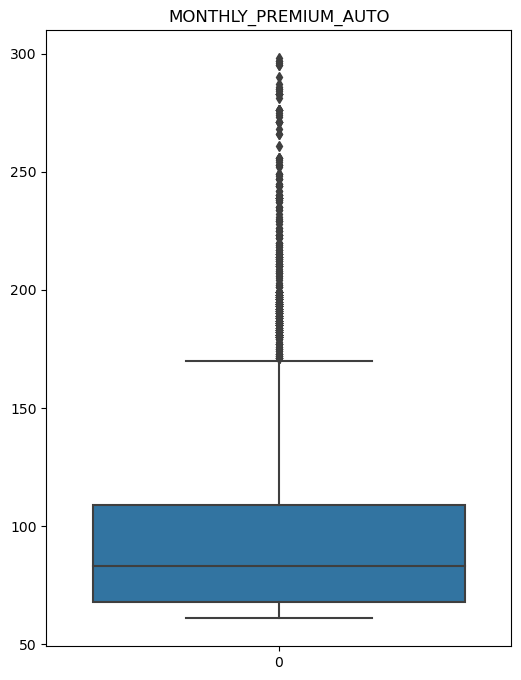

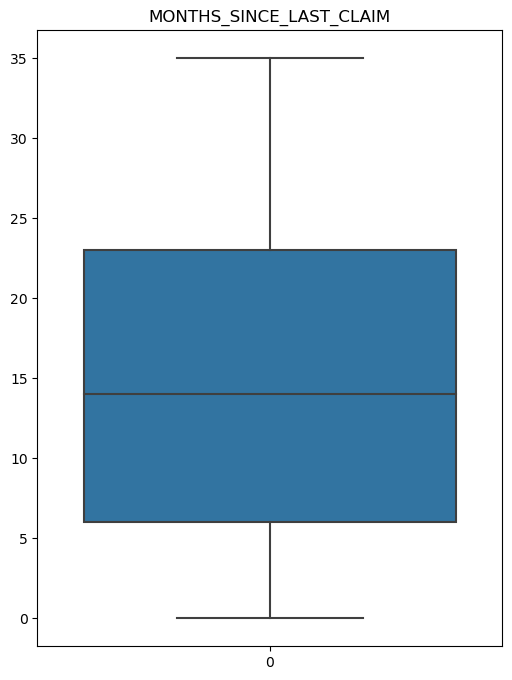

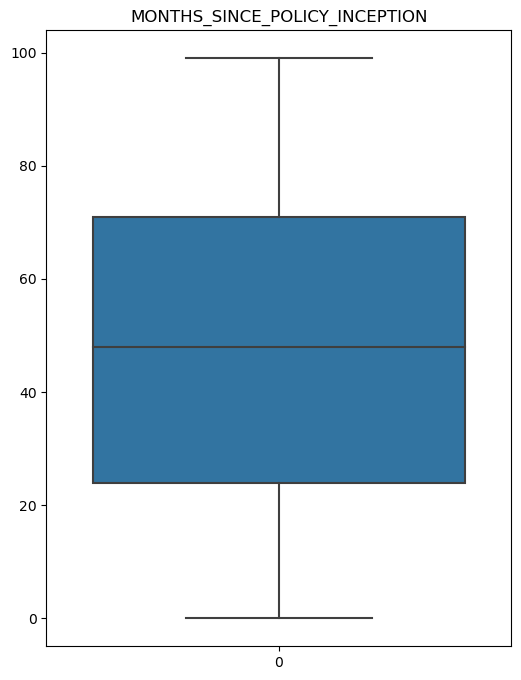

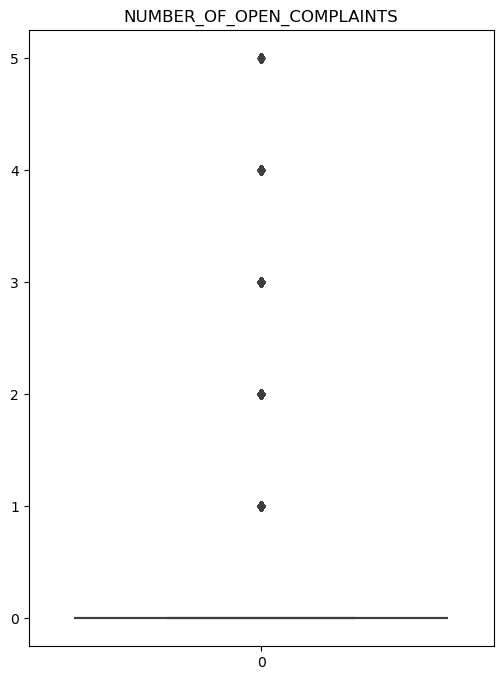

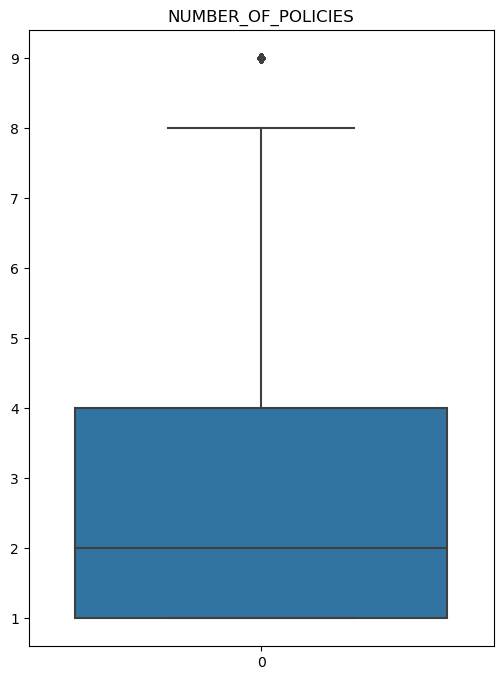

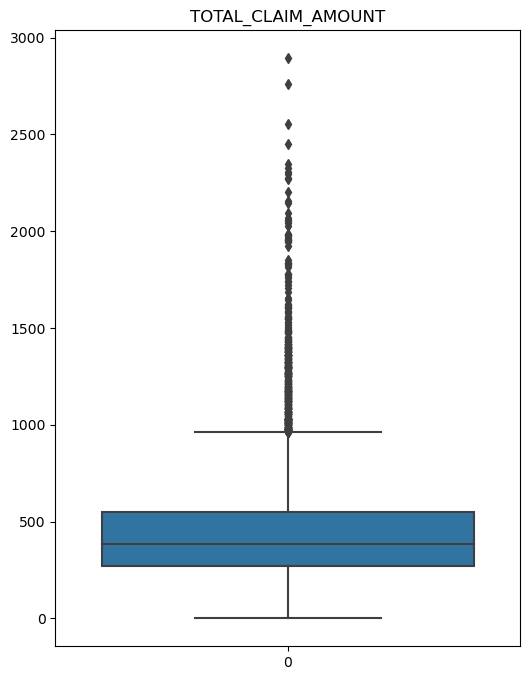

In [16]:
for col in customer_df1_numerical:
    plt.figure(figsize = (6,8))
    plt.title(col)
    sns.boxplot(customer_df1_numerical[col])

- What I can see from the plots is that non of tham is normaly distributed, most of them have a long skew and some outliers that will probably have to be dropped later.
- All of them tend to have mode in lower values. I would guess that this is related to income and monthly premium.
- Number of open complaints is dominated by "0" which is good for insurance company.

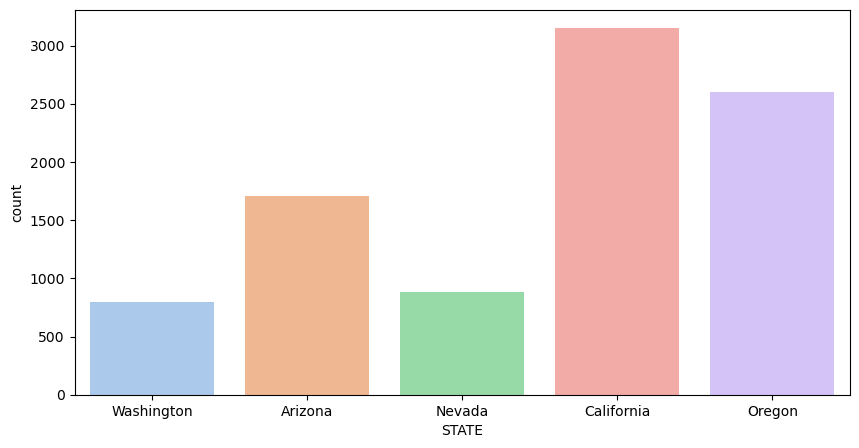

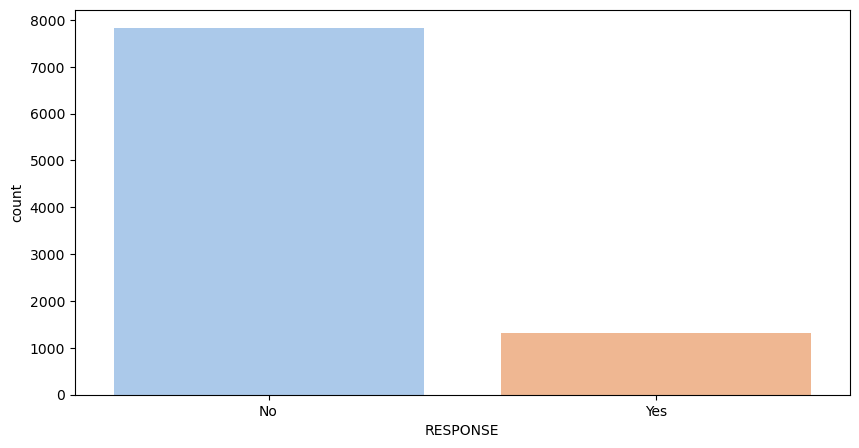

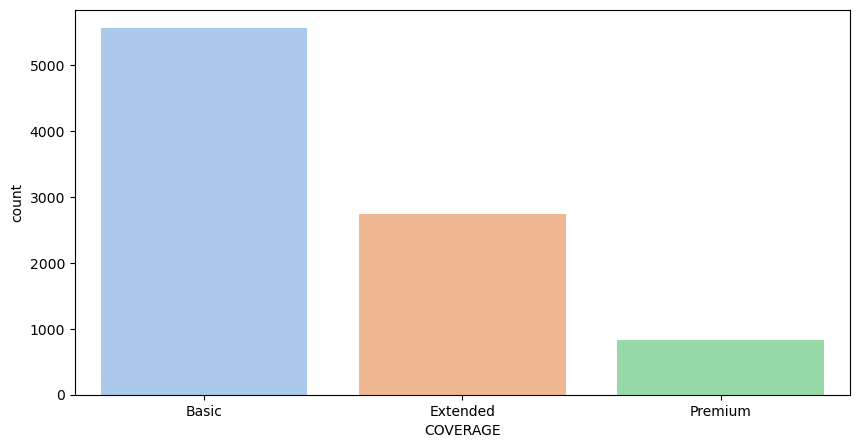

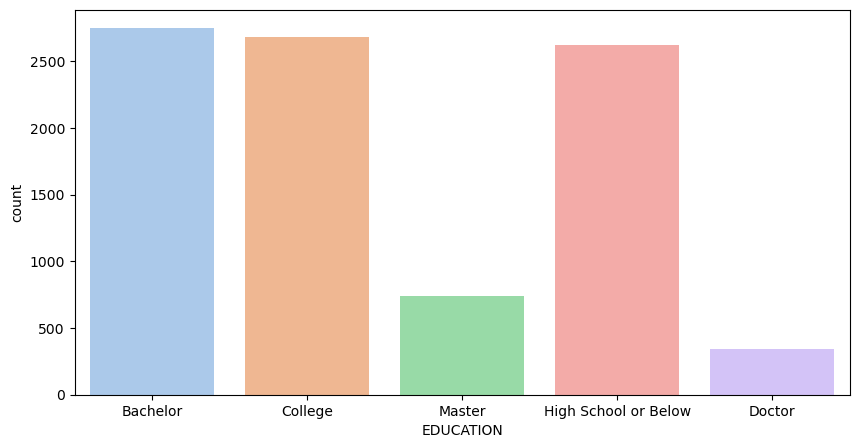

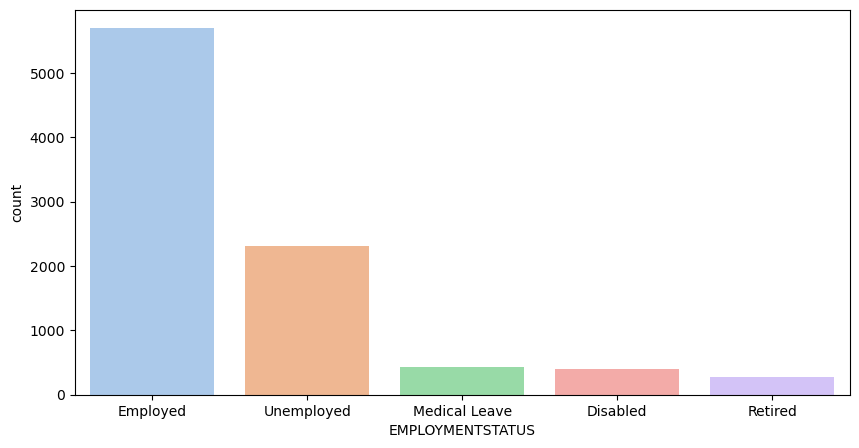

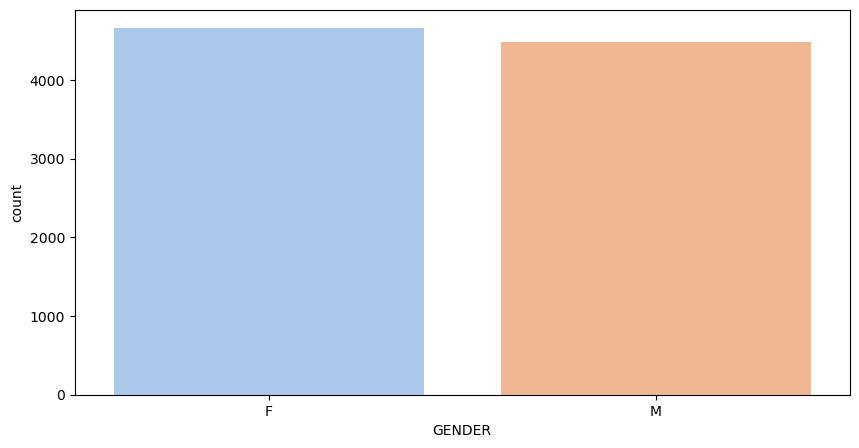

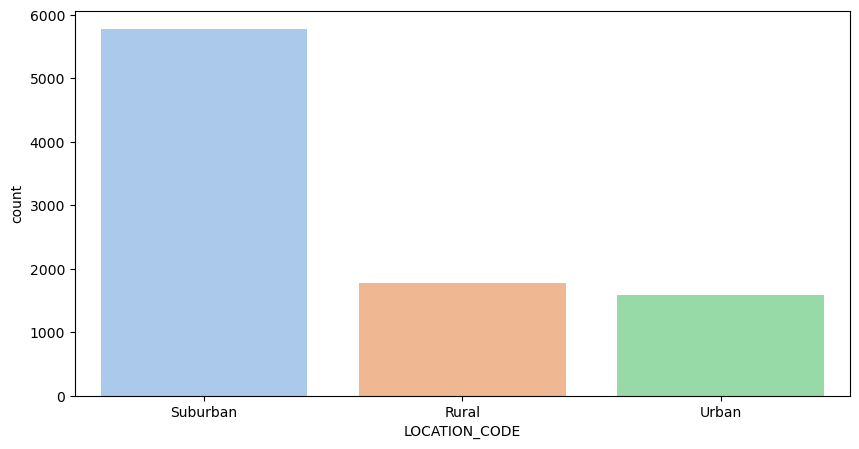

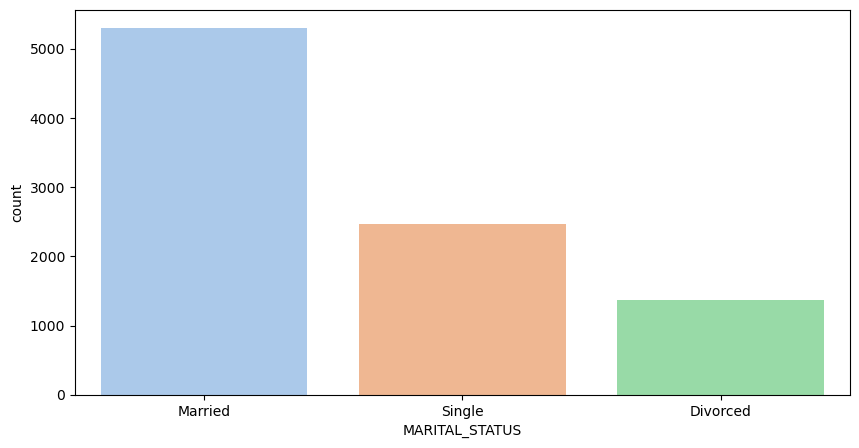

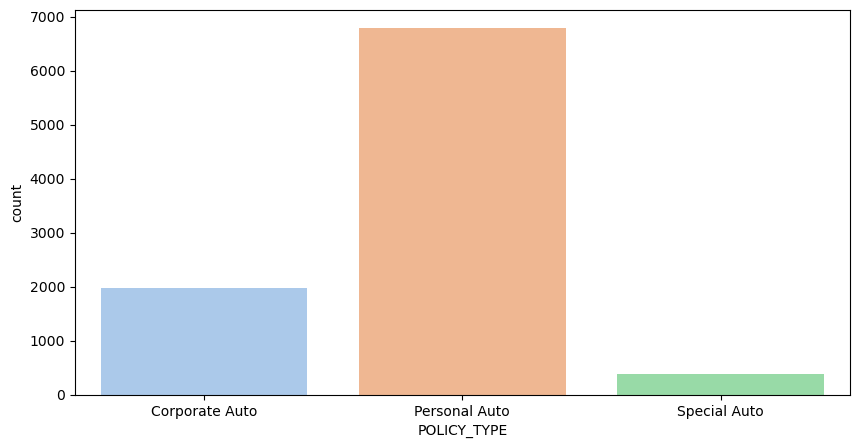

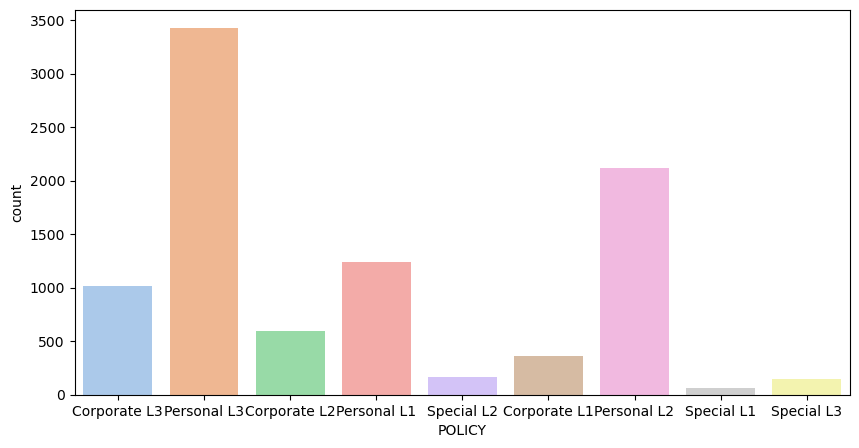

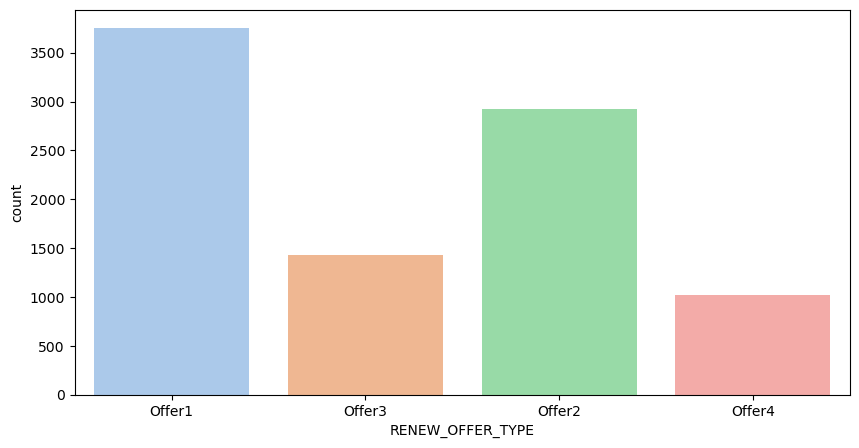

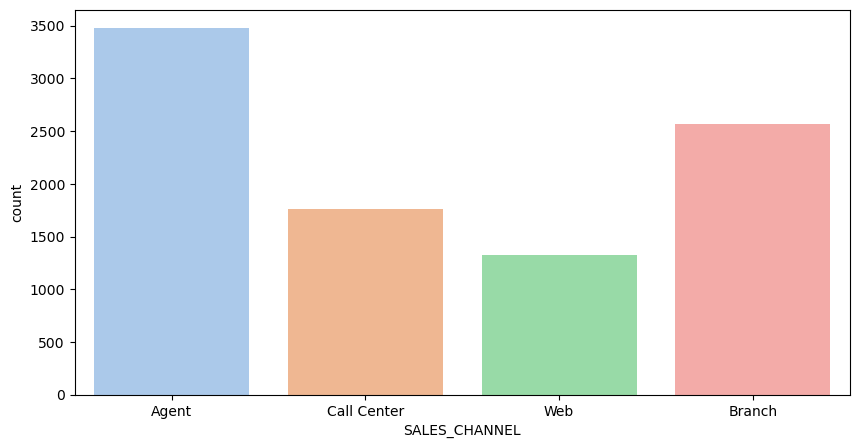

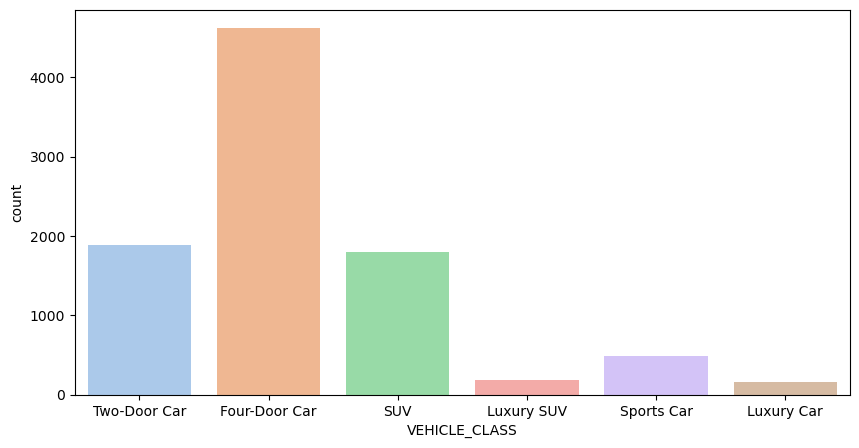

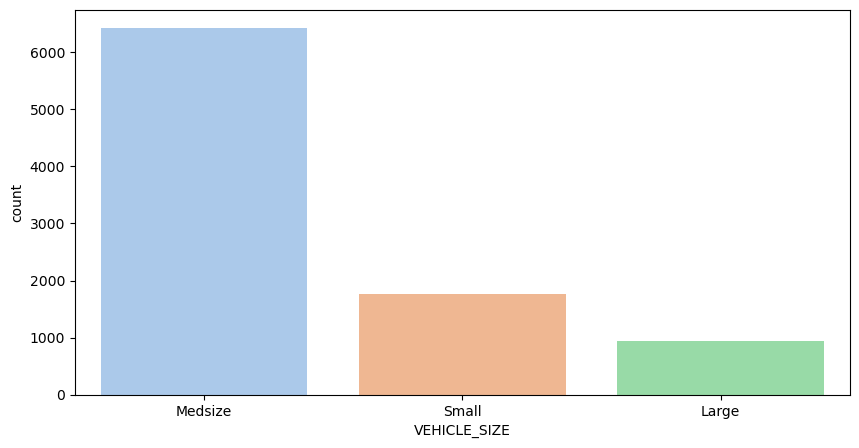

In [17]:
for col in customer_df1_categorical:
    plt.figure(figsize = (10,5))
    sns.countplot(x = col, palette = 'pastel', data = customer_df1_categorical)

#### *All the customers are from west coast, most of them from CA and OR, the sample represents M and F genders equaly, most customers have insurance for their personal car, it is usually medsize, four-door vehicle.*
#### *Also, the sample has inbalance in 'Response' category, where for the most of the customers response is 'No'.*

#### *Seems that we have no NaN's or ' ' (empty values) in the data sample.*

## lab cleaning categorical

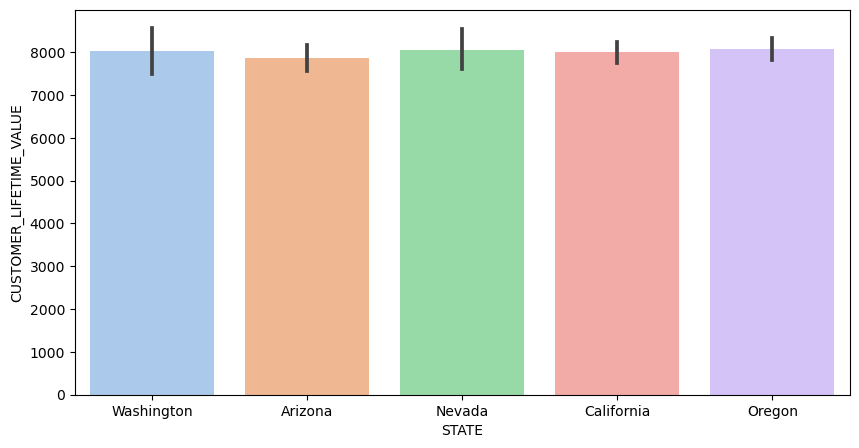

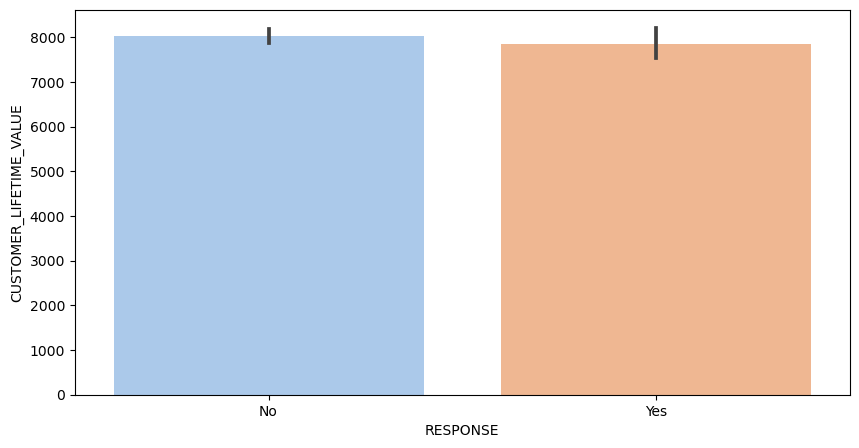

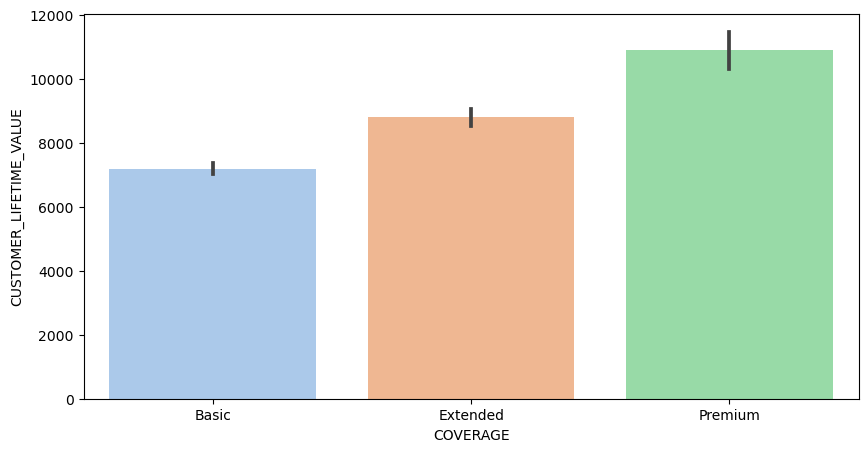

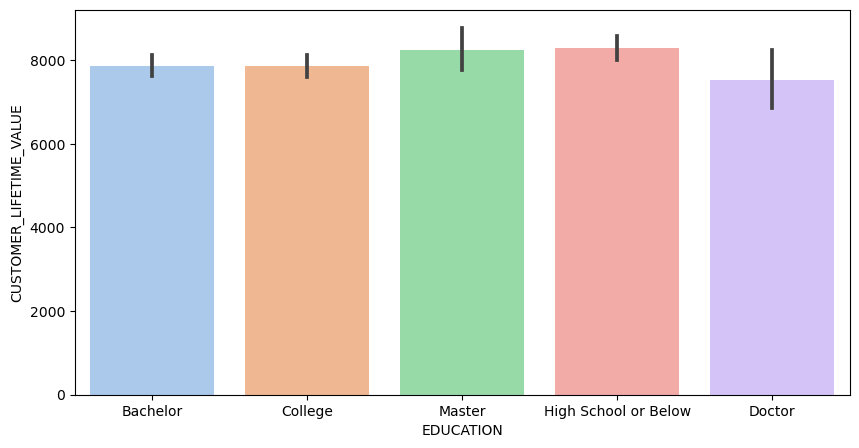

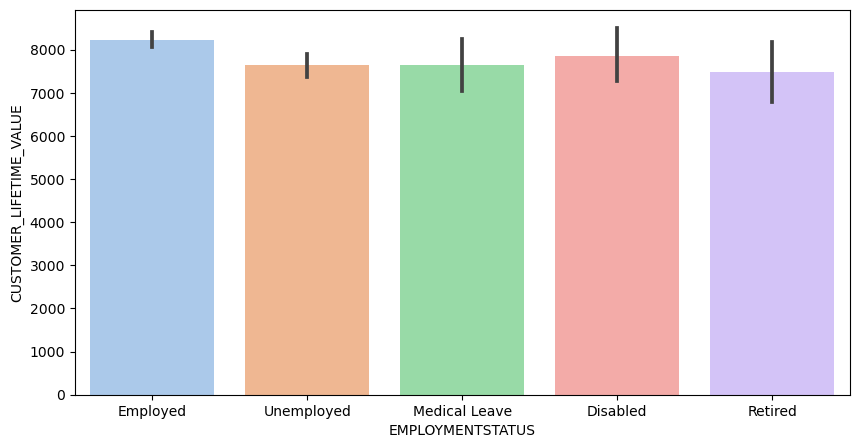

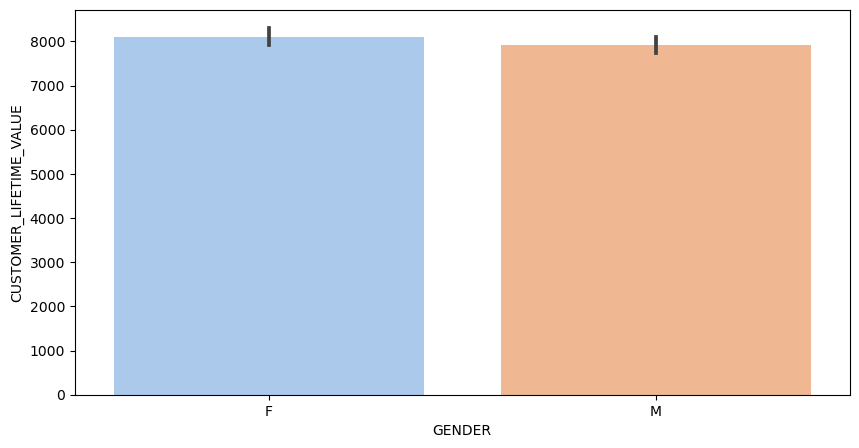

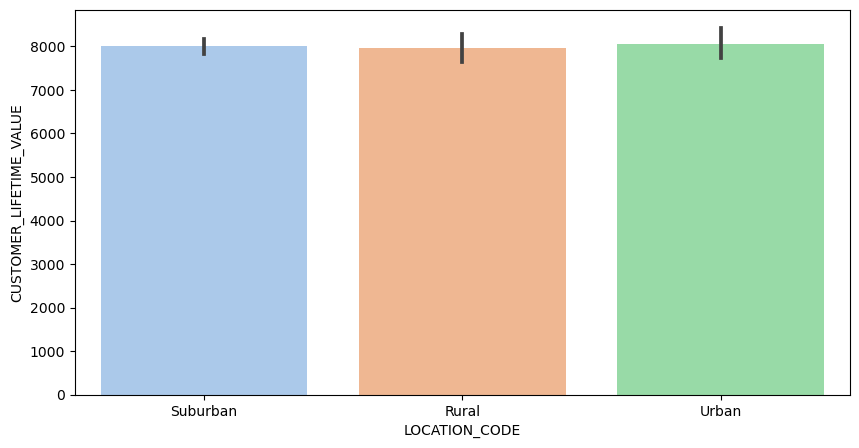

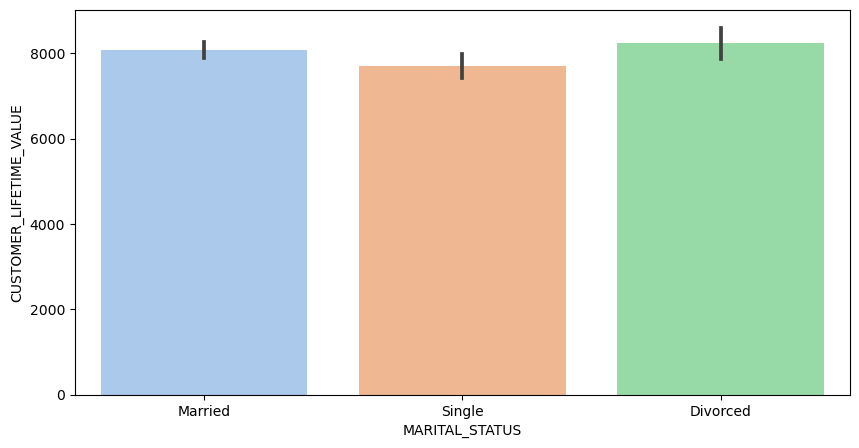

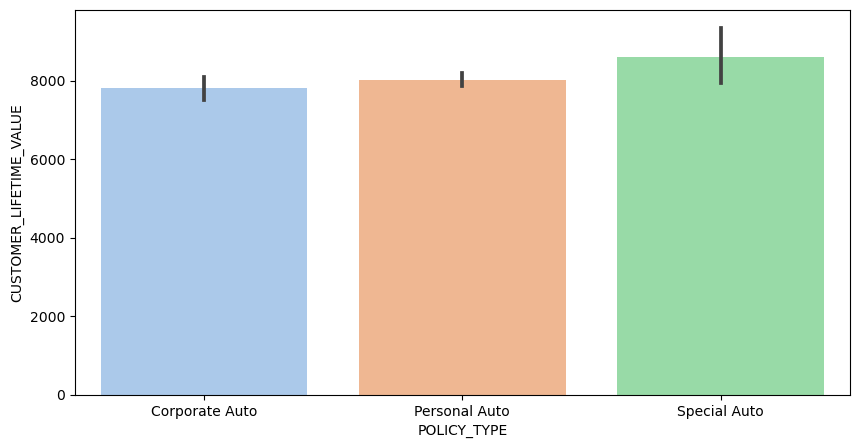

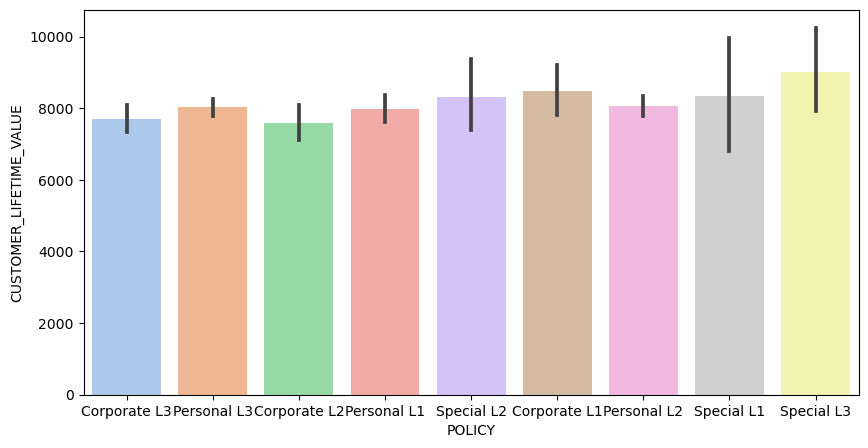

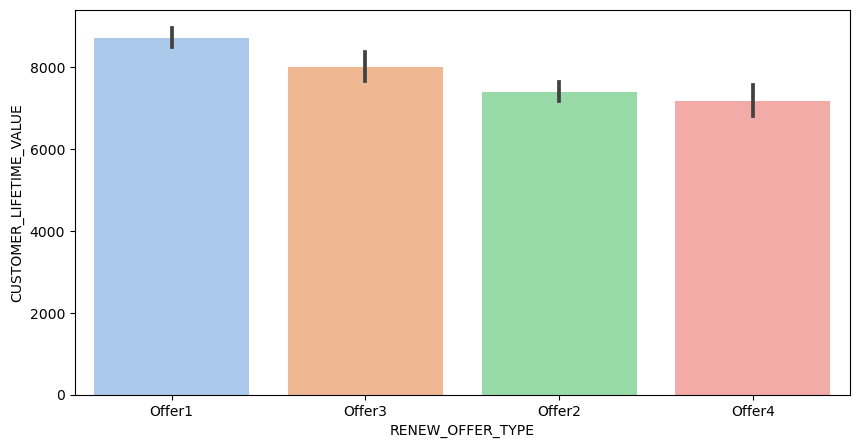

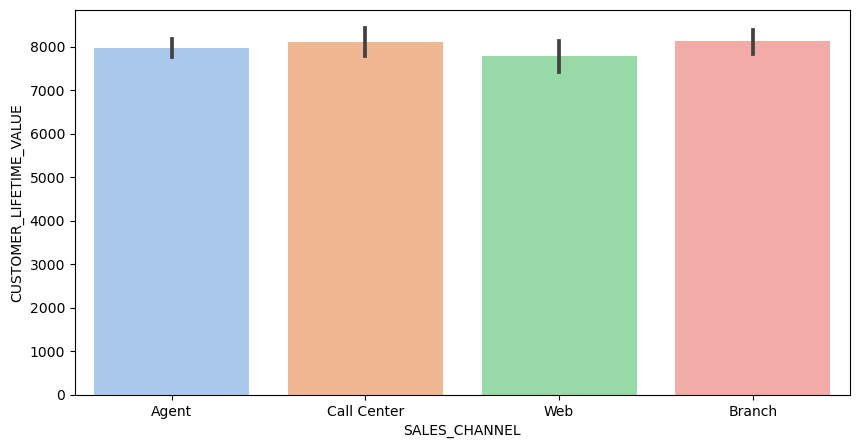

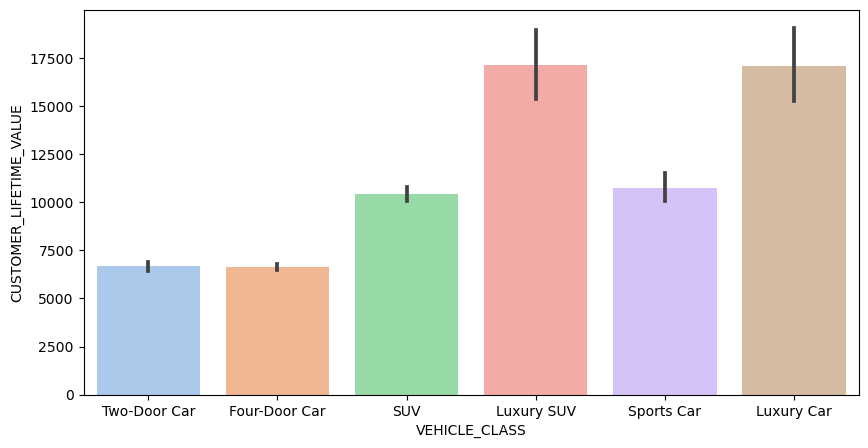

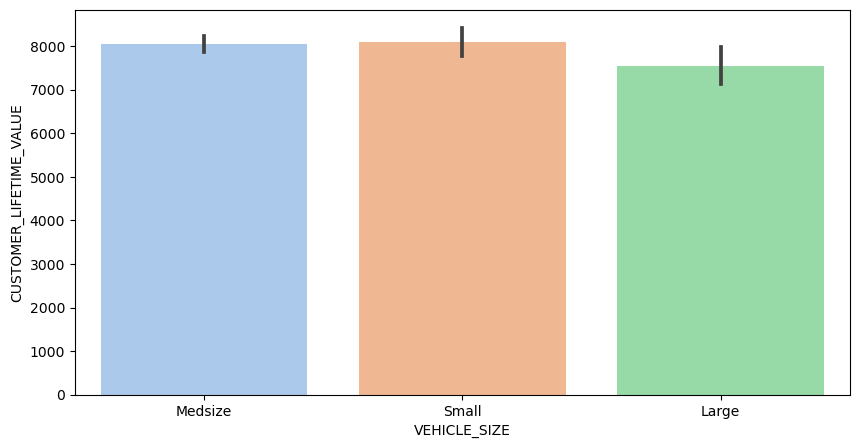

In [18]:
for col in customer_df1_categorical:
    plt.figure(figsize = (10,5))
    sns.barplot(x = col,  y = customer_df1['CUSTOMER_LIFETIME_VALUE'], palette = 'pastel', data = customer_df1_categorical)

#### *After visualisation of categorical columns in relation to target value (customer_lifetime) it is notisable that:*

- The higher coverage packege customer has - the higher lifetime value
- Employed customers have slightly higher lifetime value and less less variative (thus, more stabel)
- Customers with renew offer type 'Offer 1' have slightly higher lifetime value
- The more expensive car groups, such as SUV, Luxury, Sport cars have much higher lifetime value

In [19]:
for col in customer_df1_categorical:
    print(col, '///', customer_df1_categorical[col].value_counts())

STATE /// California    3150
Oregon        2601
Arizona       1703
Nevada         882
Washington     798
Name: STATE, dtype: int64
RESPONSE /// No     7826
Yes    1308
Name: RESPONSE, dtype: int64
COVERAGE /// Basic       5568
Extended    2742
Premium      824
Name: COVERAGE, dtype: int64
EDUCATION /// Bachelor                2748
College                 2681
High School or Below    2622
Master                   741
Doctor                   342
Name: EDUCATION, dtype: int64
EMPLOYMENTSTATUS /// Employed         5698
Unemployed       2317
Medical Leave     432
Disabled          405
Retired           282
Name: EMPLOYMENTSTATUS, dtype: int64
GENDER /// F    4658
M    4476
Name: GENDER, dtype: int64
LOCATION_CODE /// Suburban    5779
Rural       1773
Urban       1582
Name: LOCATION_CODE, dtype: int64
MARITAL_STATUS /// Married     5298
Single      2467
Divorced    1369
Name: MARITAL_STATUS, dtype: int64
POLICY_TYPE /// Personal Auto     6788
Corporate Auto    1968
Special Auto       378
Na

I could not spot any NaN values in categorical columns. At the same time, some values in columns could be clustered,
for instance, in *Vehicle_Class* columns, *Sports Car* and 2 types of *Luxury* car could be grouped in one *LUXURY CAR* category, because they have such a small representation separately, and at the same time just mean 'expensive car'.


## lab feature extraction

In [20]:
customer_df1_categorical.head()

,STATE,RESPONSE,COVERAGE,EDUCATION,EMPLOYMENTSTATUS,GENDER,LOCATION_CODE,MARITAL_STATUS,POLICY_TYPE,POLICY,RENEW_OFFER_TYPE,SALES_CHANNEL,VEHICLE_CLASS,VEHICLE_SIZE
0,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize


Looking at categorical colums I see that some categories in the columns could be clustered/merged.
For instance:
- Vehicle_Class: Sport Car and 2 types of Luxury car could be grouped in one LUXURY CAR category
- Education: Master + PhD could be grouped into Post graduate
- Employment status - medical leave, pension, disabled could be group into 'Unemployed subsidy holders'
- Policies could be grouped into 3 categories: Personal, Corporate and Special

In [21]:
customer_df1.head()

,CUSTOMER,STATE,CUSTOMER_LIFETIME_VALUE,RESPONSE,COVERAGE,EDUCATION,EFFECTIVE_TO_DATE,EMPLOYMENTSTATUS,GENDER,INCOME,LOCATION_CODE,MARITAL_STATUS,MONTHLY_PREMIUM_AUTO,MONTHS_SINCE_LAST_CLAIM,MONTHS_SINCE_POLICY_INCEPTION,NUMBER_OF_OPEN_COMPLAINTS,NUMBER_OF_POLICIES,POLICY_TYPE,POLICY,RENEW_OFFER_TYPE,SALES_CHANNEL,TOTAL_CLAIM_AMOUNT,VEHICLE_CLASS,VEHICLE_SIZE
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2011-02-24,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,2011-01-31,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2011-02-19,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,2011-01-20,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2011-02-03,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


<Axes: xlabel='EFFECTIVE_TO_DATE', ylabel='Count'>

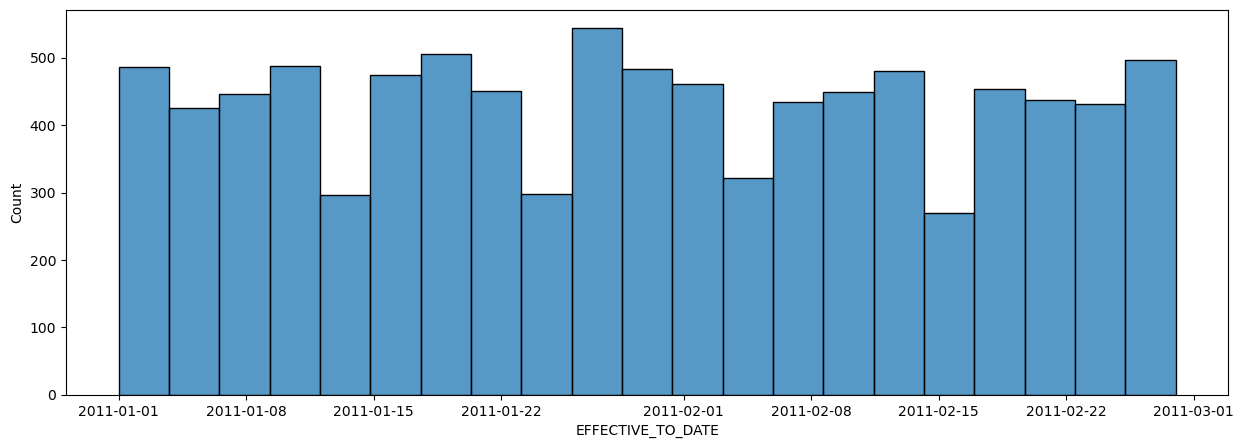

In [28]:
plt.figure(figsize = (15,5))
sns.histplot(x = customer_df1['EFFECTIVE_TO_DATE'], data = customer_df1)

Since EFFECTIVE_TO_DATE is only in JAN and FEB, I could pull it out to 2 categories and see in which month the target value was higher.